# Assignment 3

## Digital Musicology

@authors: Joris Monnet, Xingyu Pan, Yutaka Osaki, Yiwei Liu

Due Date: 15/05/2024

### Task C1

### Function to distinguish phrases based on volume using midi file

In [8]:
import matplotlib.pyplot as plt
from music21 import converter

In [9]:
def get_volume(midi_file):
    """
    Extracts the velocity values (volume) of each note from a MIDI file.

    Parameters:
    midi_file (music21.stream.Score): The input MIDI file represented as a music21 Score object.
    
    Returns:
    velocities (list of int): A list containing the velocity values of all the notes in the MIDI file.
    """
    velocities = []
    for part in midi_file.parts:
        for note in part.flatten().notes:
            if note.isNote:
                velocities.append(note.volume.velocity)
            elif note.isChord:
                for _ in note.pitches:
                    velocities.append(note.volume.velocity)
    return velocities


In [10]:
def get_scaled_differences_in_volumes(list_volume_performed):
    """
    Calculates the squared differences in volume between consecutive elements
    in the input list, and scales these differences to the range [0, 1].

    Parameters:
    list_volume_performed (list of int or float): A list of volume values.

    Returns:
    list_volume_differences_scaled (list of float): A list of scaled squared differences in volume, 
                                                     where the values are normalized to the range [0, 1].
    """
    list_volume_differences = [abs(list_volume_performed[i] - list_volume_performed[i + 1]) ** 2
                               for i in range(len(list_volume_performed) - 1)]
    max_difference = max(list_volume_differences)
    list_volume_differences_scaled = [x / max_difference for x in list_volume_differences]
    return list_volume_differences_scaled


In [11]:
def plot_volume_and_possibilities(list_volume_performed):
    """
    Plots the volume values and the scaled squared differences in volume.

    Parameters:
    list_volume_performed (list of int or float): A list of volume values.
    list_volume_differences_scaled (list of float): A list of scaled squared differences in volume, 
                                                    where the values are normalized to the range [0, 1].

    Returns:
    None
    """
    list_volume_differences_scaled = get_scaled_differences_in_volumes(list_volume_performed)
    fig, axes = plt.subplots(3, 1, figsize=(10, 12))  # 縦に三列

    # データ範囲の設定
    ranges = [(0, len(list_volume_differences_scaled) // 3),
              (len(list_volume_differences_scaled) // 3 + 1, len(list_volume_differences_scaled) // 3 * 2),
              (len(list_volume_differences_scaled) // 3 * 2 + 1, len(list_volume_differences_scaled))]
    titles = ["[0:1000]", "[1001:2000]", "[2001:]"]

    for i, (start, end) in enumerate(ranges):
        ax1 = axes[i]
        ax2 = ax1.twinx()

        color = 'tab:blue'
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Volume Performed', color=color)
        ax1.plot(list_volume_performed[start:end], label='Volume Performed', color=color)
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.legend(loc='upper left')
        ax1.set_ylim(0, 100)

        color = 'tab:red'
        ax2.set_ylabel('Possibilities of Distinction based on volumes', color=color)
        ax2.plot(list_volume_differences_scaled[start:end], label='Possibilities of Distinction', color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.legend(loc='upper right')
        ax2.set_ylim(0, 1)
        ax1.set_title(titles[i])

    plt.tight_layout()
    plt.show()

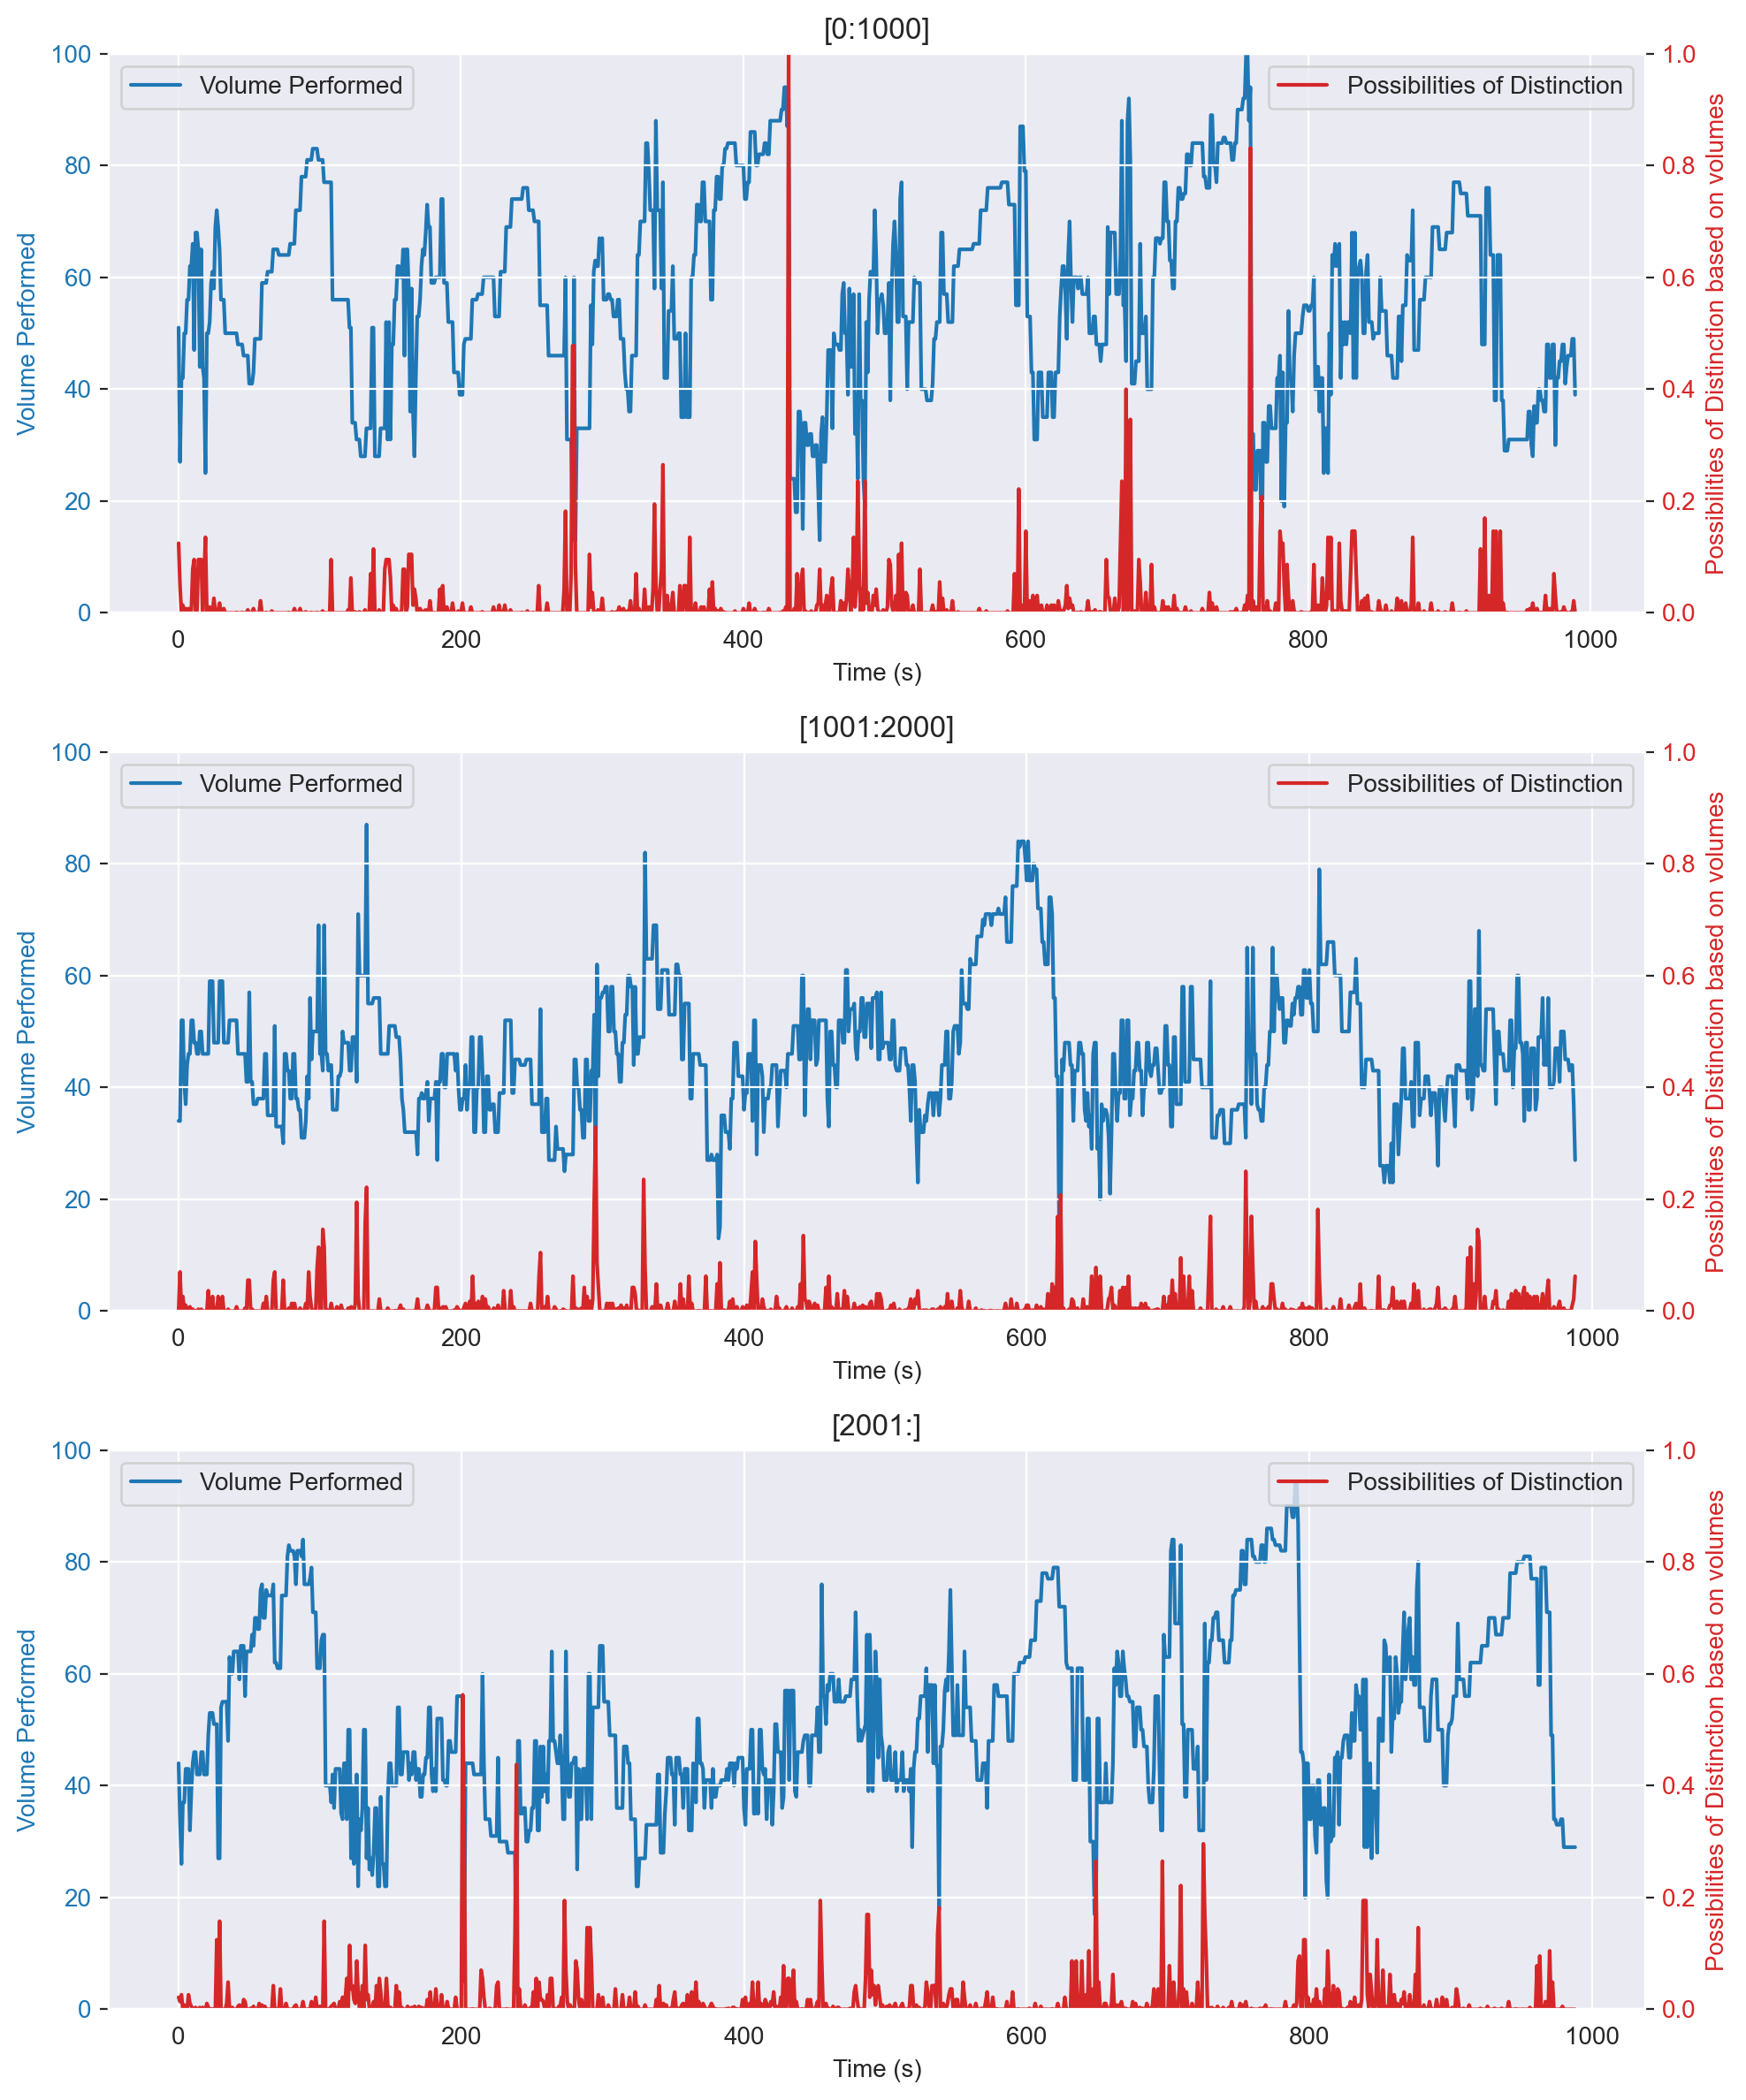

In [12]:
# MIDIファイルを読み込む
midi_file_performed = converter.parse('asap-dataset/Schubert/Moment_Musical_no_1/MunA10M.mid')
list_volume_performed = get_volume(midi_file_performed)
# list_volume_differences_scaled = get_scaled_differences_in_volumes(list_volume_performed)
plot_volume_and_possibilities(list_volume_performed)

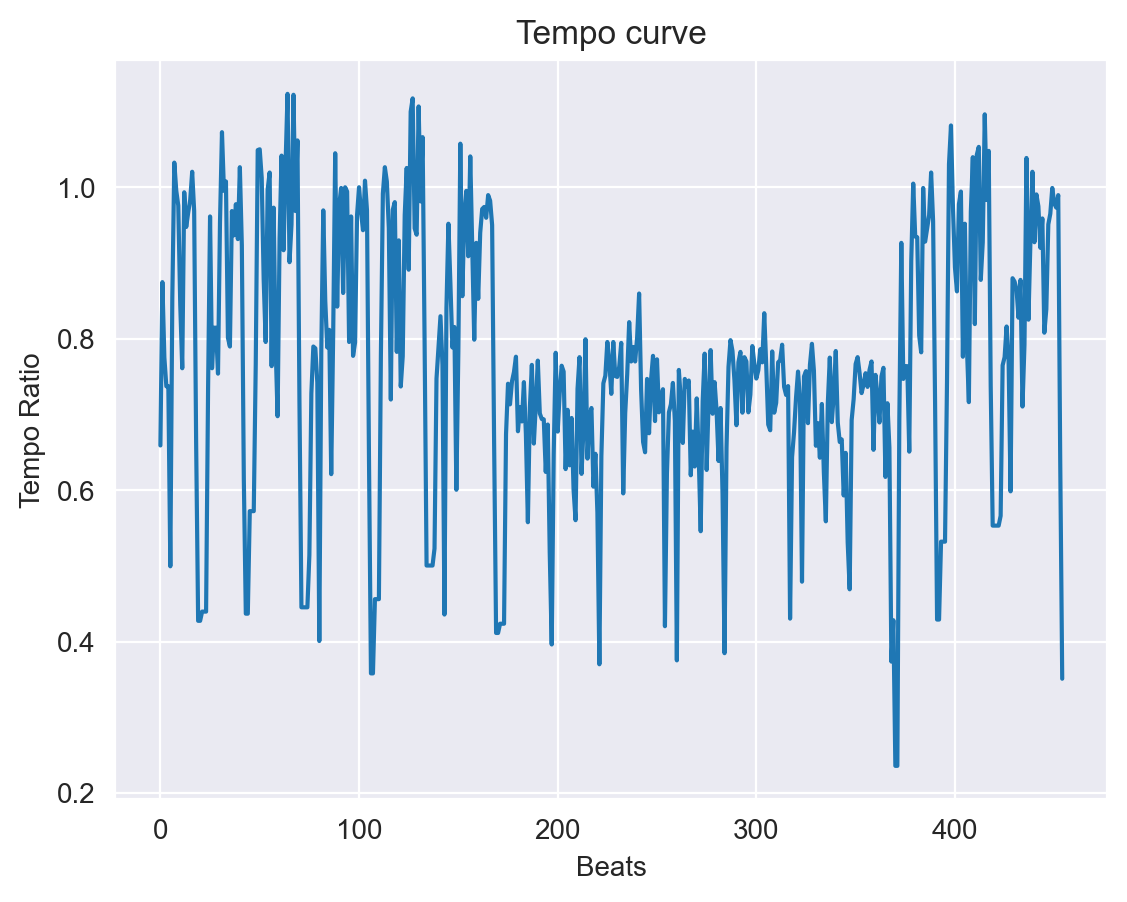

In [13]:
from src.timing_plotter import plot_timing_for_one_piece
from src.timing_for_one_piece import get_average_timing_one_piece, get_tempo_map

average = get_average_timing_one_piece('asap-dataset/Schubert/Moment_Musical_no_1')
plot_timing_for_one_piece(get_tempo_map(average))

[0, 6, 21, 30, 36, 66, 81, 87, 99, 111, 129, 138, 144, 150, 159, 171, 198, 222, 234, 243, 255, 267, 285, 297, 306, 318, 348, 372, 378, 414, 420, 435, 447]
[0.950521, 5.6770830000000005, 16.03125, 23.844792, 27.385416999999997, 47.788021, 60.873957999999995, 65.015625, 72.33125, 83.169792, 93.9416665, 101.127083, 106.21354199999999, 110.329167, 115.68958300000001, 124.34166699999999, 147.785417, 167.866146, 176.775, 183.1067705, 192.80625, 202.70625, 217.883854, 226.707292, 233.0796875, 242.5166665, 267.06875, 289.5161455, 293.8875, 318.159375, 322.045442625, 333.589583, 340.769792]
[0.0, 2.0, 5.0, 3.0, 2.0, 10.0, 5.0, 2.0, 4.0, 4.0, 6.0, 3.0, 2.0, 2.0, 3.0, 4.0, 9.0, 8.0, 4.0, 3.0, 4.0, 4.0, 6.0, 4.0, 3.0, 4.0, 10.0, 8.0, 2.0, 12.0, 2.0, 5.0, 4.0]
149.0


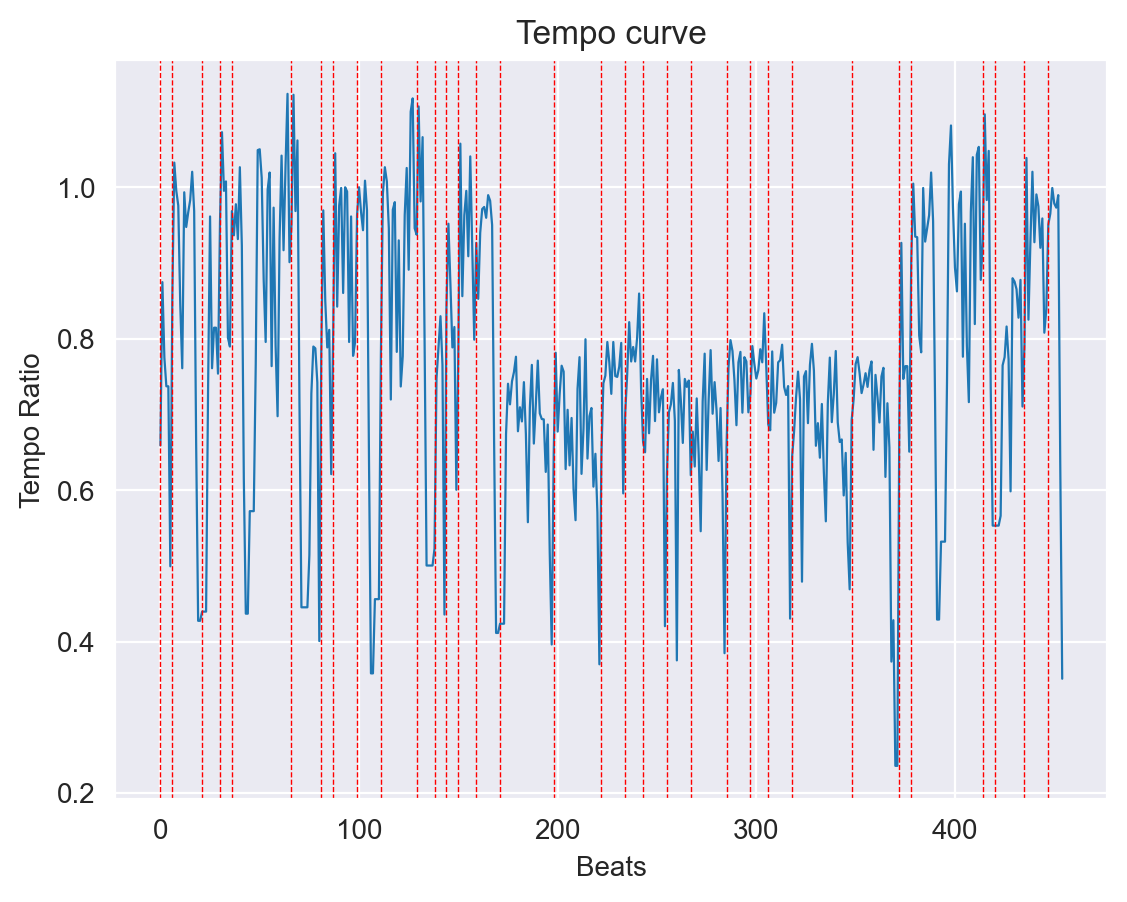

In [71]:
%reload_ext autoreload

from src.task_c1 import get_phrase_boundaries

boundaries, boundaries_times = get_phrase_boundaries('asap-dataset/Schubert/Moment_Musical_no_1')
print(boundaries)
print(boundaries_times)
measures = [boundaries[0] / 3] + [(boundaries[i] - boundaries[i - 1]) / 3 for i in range(1, len(boundaries))]
print(measures)
print(sum(measures))
average = get_average_timing_one_piece('asap-dataset/Schubert/Moment_Musical_no_1')
plot_timing_for_one_piece(get_tempo_map(average), boundaries)

### Task C3

### Task C4